# Antes de empezar:
- Lee el archivo README.md
- Comenta tanto como puedas y utiliza los recursos (archivo README.md)
- ¡Feliz aprendizaje

In [7]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest

from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem

# Reto 1 - Explorando los Datos

En este reto, examinaremos todos los salarios de los empleados de la Ciudad de Chicago. Comenzaremos cargando el conjunto de datos y examinando su contenido.

In [12]:
# Run this code:
salaries = pd.read_csv(r'C:\Users\ievav\OneDrive\Documents\Ironhack\Assignments\ironhack-lab-hypothesis-testing\data\Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examina el conjunto de datos `salaries` utilizando la función `head` que se muestra a continuación.

In [16]:
salaries.head(50)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
8,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,103350.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


# Reto 2 - Pruebas de Hipótesis

En esta sección del laboratorio, vamos a probar si el salario por hora de todos los trabajadores por hora es significativamente diferente de $30/hora. Importa la función correcta para la prueba de una muestra desde scipy y realiza la prueba de hipótesis para un intervalo de confianza de dos lados del 95%.

In [27]:
from scipy.stats import ttest_1samp

hourly_salaries = salaries[salaries['Hourly Rate'].notna()]
hourly_salaries.head()

t_statistic, p_value = ttest_1samp(hourly_salaries['Hourly Rate'], 30)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: The average hourly salary is significantly different from $30.")
else:
    print("Fail to reject the null hypothesis: The average hourly salary is not significantly different from $30.")

T-statistic: 20.6198057854942
P-value: 4.3230240486229894e-92
Reject the null hypothesis: The average hourly salary is significantly different from $30.


# Reto 3 - Construyendo Intervalos de Confianza

Aunque probar nuestra hipótesis es una excelente manera de obtener evidencia empírica para aceptar o rechazar la hipótesis, otra forma de recopilar evidencia es creando un intervalo de confianza. Un intervalo de confianza nos brinda información sobre la media verdadera de la población. Por lo tanto, para un intervalo de confianza del 95%, estamos seguros en un 95% de que la media de la población se encuentra dentro del intervalo de confianza.

Para leer más sobre los intervalos de confianza, haz clic [aquí](https://es.wikipedia.org/wiki/Intervalo_de_confianza).

En la celda a continuación, construiremos un intervalo de confianza del 95% para el salario por hora medio de todos los trabajadores por hora.

El intervalo de confianza se calcula en SciPy utilizando la función `t.interval`. Puedes leer más sobre esta función [aquí](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

Para calcular el intervalo de confianza del salario por hora, usa 0.95 para el nivel de confianza, el número de filas - 1 para los grados de libertad, la media de la muestra para el parámetro de ubicación y el error estándar para la escala. El error estándar se puede calcular utilizando [esta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) función en SciPy.

In [44]:
from scipy import stats

In [46]:
mean_salary = hourly_salaries['Hourly Rate'].mean()
sem_salary = stats.sem(hourly_salaries['Hourly Rate'])

# Degrees of freedom
df = len(hourly_salaries) - 1

# Confidence level
confidence_level = 0.95

# Calculate the confidence interval
confidence_interval = stats.t.interval(confidence_level, df, loc=mean_salary, scale=sem_salary)

# Display the confidence interval
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (32.52345834488425, 33.05365708767623)


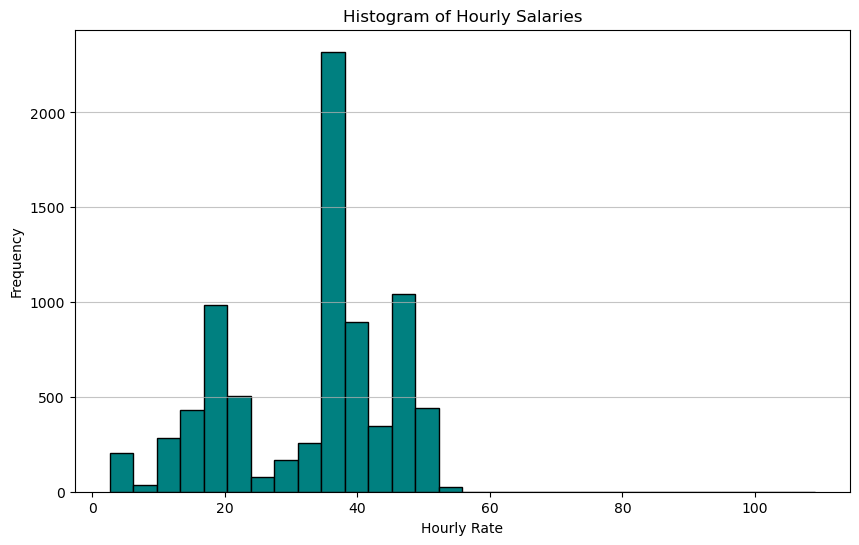

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(hourly_salaries['Hourly Rate'], bins=30, color='teal', edgecolor='black')
plt.title('Histogram of Hourly Salaries')
plt.xlabel('Hourly Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Reto 4 - Pruebas de Hipótesis de Proporciones

Otro tipo de prueba de una muestra es una prueba de hipótesis de proporciones. En esta prueba, examinamos si la proporción de un grupo en nuestra muestra es significativamente diferente de una fracción.

Puedes leer más sobre las pruebas de proporción de una muestra [aquí](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

En la celda a continuación, utiliza la función `proportions_ztest` de `statsmodels` para realizar una prueba de hipótesis que determinará si el número de trabajadores por hora en la Ciudad de Chicago es significativamente diferente del 25% en el nivel de confianza del 95%.

In [67]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

hourly = len(hourly_salaries)
not_hourly = len(salaries)       
value = 0.2  # hypothesized proportion

# Perform the two-sided z-test for proportions
stat, p_value = proportions_ztest(hourly, not_hourly, value=value, alternative='two-sided')

# Calculate the 95% confidence interval for the proportion of hourly workers
confint_low, confint_high = proportion_confint(hourly, not_hourly, alpha=0.05, method='normal')

# Display the result
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")
print(f"95% Confidence Interval: ({confint_low:.4f}, {confint_high:.4f})")

Z-statistic: -3.5099964213703005
P-value: 0.0004481127249057967
95% Confidence Interval: (0.2371, 0.2464)
